In [3]:
import requests
from bs4 import BeautifulSoup
import json
import urllib.parse
import re

In [4]:
login_url = "https://www.boligportal.dk/api/login"
front_url = "https://www.boligportal.dk"
message_url = "https://www.boligportal.dk/api/messaging/send"
apt_url = "https://www.boligportal.dk/lejligheder/k%C3%B8benhavn/66m2-2-vaer-id-4549933"
inbox_url = "https://www.boligportal.dk/indbakke/"


user_data = json.dumps({"username":"frederikpwr@gmail.com",
             "password":"!@9CHuU!tszLP&"})

message_data = {"ad_id":4549933,
                           "body":"testing123"}

In [5]:
r = requests.post(login_url, data = user_data)
print(r)

<Response [200]>


In [6]:
import requests

def send_message_to_owner(apt_url, email, password, message):
    with requests.Session() as s:
        r = s.get(front_url) # load front page
        

        r = s.post("https://consent.app.cookieinformation.com/api/consent",
                    data={"website_uuid": "f5510035-790d-43f0-94c7-4e49b742a6a4",
                            "timestamp": "2024-04-08T21:02:59.328Z",
                            "consent_url": "https://www.boligportal.dk/",
                            "consent_website": "boligportal.dk",
                            "consent_domain": "www.boligportal.dk",
                            "user_uid": "2c745b82-07ed-491e-b38a-31ae9f2f2e8d",
                            "consents_approved": ["cookie_cat_necessary", "cookie_cat_functional", "cookie_cat_statistic",
                                                "cookie_cat_marketing", "cookie_cat_unclassified"],
                            "consents_denied": [],
                            "user_agent": "Mozilla/5.0 (X11; Linux x86_64; rv:124.0) Gecko/20100101 Firefox/124.0"})

        r = s.post(login_url,
                    data=json.dumps({
                        "username": email,
                        "password": password,
                    })
                    )

        sessionid = r.cookies["sessionid"]
        csrftoken = r.cookies["csrftoken"]

        r = s.get(apt_url)

        r = s.post(message_url,
                    headers={"Referer": apt_url,
                            "Cookie": f"csrftoken={csrftoken}; __cf_bm=; CookieInformationConsent=; sessionid={sessionid}",
                            "X-CSRFToken": csrftoken,
                            },
                    data=json.dumps({"ad_id": apt_url.split('-')[-1], "body": message}),
                    )
    if r.status_code == 200:
        print("Message send succesfully!")
    else:
        print("Could not send message")
        
send_message_to_owner(apt_url, "frederikpwr@gmail.com", "!@9CHuU!tszLP&", "message")

Could not send message


In [7]:
url_string = "/lejligheder/k%C3%B8benhavn/46m2-2-vaer-id-5421120"

# Split the string on '-' and take the last element
last_numbers = apt_url.split('-')[-1]

print(last_numbers)  # Output: 5421120

4549933


In [8]:
import requests 
from parsel import Selector
from fake_headers import Headers


# s = requests.Session()
with requests.Session() as s:
    r = s.get(front_url) # load front page
    
    csrftoken = r.cookies["csrftoken"]
    __cf_bm = r.cookies["__cf_bm"]
    
    r = s.post("https://consent.app.cookieinformation.com/api/consent", 
               data = {"website_uuid":"f5510035-790d-43f0-94c7-4e49b742a6a4","timestamp":"2024-04-08T21:02:59.328Z","consent_url":"https://www.boligportal.dk/","consent_website":"boligportal.dk","consent_domain":"www.boligportal.dk","user_uid":"2c745b82-07ed-491e-b38a-31ae9f2f2e8d","consents_approved":["cookie_cat_necessary","cookie_cat_functional","cookie_cat_statistic","cookie_cat_marketing","cookie_cat_unclassified"],"consents_denied":[],"user_agent":"Mozilla/5.0 (X11; Linux x86_64; rv:124.0) Gecko/20100101 Firefox/124.0"})
    

    
    r = s.post(login_url,
        data=json.dumps({
            "username": "frederikpwr@gmail.com",
            "password": "!@9CHuU!tszLP&",
        })
    )

        
    sessionid = r.cookies["sessionid"]
    csrftoken = r.cookies["csrftoken"]
    
    
    
    
    r = s.get(apt_url)

    
    r = s.post(message_url,
                headers = {"Referer" : apt_url,
                           "Cookie" : f"csrftoken={csrftoken}; __cf_bm=; CookieInformationConsent=; sessionid={sessionid}",
                            "X-CSRFToken": csrftoken,
                },
                data = json.dumps({"ad_id":4549933,"body":"testing123"}),
                             
    )

    print(r.text)

{"error": {"message": "Ad is not contactable via message", "code": "ad_not_contactable_via_message"}}


In [9]:
with requests.session() as s:
    s.post(login_url, data = user_data)

    s.get(apt_url)    

    r = s.post(message_url, data=message_data)
    print(r)


<Response [403]>


In [10]:
POST /api/messaging/send HTTP/2
Host: www.boligportal.dk
User-Agent: Mozilla/5.0 (X11; Linux x86_64; rv:124.0) Gecko/20100101 Firefox/124.0
Accept: */*
Accept-Language: da
Accept-Encoding: gzip, deflate, br
Referer: https://www.boligportal.dk/lejligheder/k%C3%B8benhavn/57m2-2-vaer-id-5287689
X-Request-Source: WEB_FRONTEND
X-CSRFToken: SYpJc7kB9Mtk9fkOwHYrbzl0mDOLcWcn
Content-Type: text/plain;charset=UTF-8
Content-Length: 35
Origin: https://www.boligportal.dk
Connection: keep-alive
Cookie: csrftoken=SYpJc7kB9Mtk9fkOwHYrbzl0mDOLcWcn; CookieInformationConsent=%7B%22website_uuid%22%3A%22f5510035-790d-43f0-94c7-4e49b742a6a4%22%2C%22timestamp%22%3A%222024-03-31T16%3A12%3A24.948Z%22%2C%22consent_url%22%3A%22https%3A%2F%2Fwww.boligportal.dk%2Flejligheder%2Fk%25C3%25B8benhavn%2F58m2-2-vaer-id-5296381%22%2C%22consent_website%22%3A%22boligportal.dk%22%2C%22consent_domain%22%3A%22www.boligportal.dk%22%2C%22user_uid%22%3A%22505ec2b3-966e-4a11-b5c9-72d808f4243f%22%2C%22consents_approved%22%3A%5B%22cookie_cat_necessary%22%5D%2C%22consents_denied%22%3A%5B%22cookie_cat_functional%22%2C%22cookie_cat_statistic%22%2C%22cookie_cat_marketing%22%2C%22cookie_cat_unclassified%22%5D%2C%22user_agent%22%3A%22Mozilla%2F5.0%20%28X11%3B%20Linux%20x86_64%3B%20rv%3A124.0%29%20Gecko%2F20100101%20Firefox%2F124.0%22%7D; __cf_bm=To61LnbbRj4tBz7agMR1vO9RJ7lArmqOkzIHFsm3uIc-1712601066-1.0.1.1-majzb9beZwMonF4hI9fSyYP5WCHOxgog0GbQ5x1yV8zd8W6nLj2GezmRonFZP60I40uPA45D3won1Z.9XRfKRA; sessionid=a89ra3lq3yf8s4dxw1a03cw7v9q2m0v2
Sec-Fetch-Dest: empty
Sec-Fetch-Mode: cors
Sec-Fetch-Site: same-origin
TE: trailers

SyntaxError: invalid decimal literal (1118089019.py, line 7)

In [ ]:
HTTP/2 200 
date: Mon, 08 Apr 2024 18:32:05 GMT
content-type: application/json
report-to: {"group":"heroku-nel","max_age":3600,"endpoints":[{"url":"https://nel.heroku.com/reports?ts=1712601125&sid=c4c9725f-1ab0-44d8-820f-430df2718e11&s=oJHxYd5rVcthxDLzoQrWdX%2BRYE7GNaD2wgtdUCqoudY%3D"}]}
reporting-endpoints: heroku-nel=https://nel.heroku.com/reports?ts=1712601125&sid=c4c9725f-1ab0-44d8-820f-430df2718e11&s=oJHxYd5rVcthxDLzoQrWdX%2BRYE7GNaD2wgtdUCqoudY%3D
nel: {"report_to":"heroku-nel","max_age":3600,"success_fraction":0.005,"failure_fraction":0.05,"response_headers":["Via"]}
x-frame-options: DENY
vary: Accept-Language, Cookie
content-language: da
strict-transport-security: max-age=31536000
x-content-type-options: nosniff
cross-origin-opener-policy: same-origin-allow-popups
via: 1.1 vegur
cf-cache-status: DYNAMIC
server: cloudflare
cf-ray: 871456892c3992a3-CPH
content-encoding: gzip
X-Firefox-Spdy: h2

In [ ]:
import os
duration = 1  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

sh: line 1: play: command not found


32512

In [ ]:
from utils import internet_connection

print(internet_connection())

False


In [ ]:
try:
    rooms, area = re.findall(r'\d+', title)
except:
    rooms = "N/A"
    area = "N/A"

In [ ]:
import re
location = "Brøndby, Kirkebjerg Parkvej"


google_url = "https://maps.google.com/maps?q="+'+'.join(re.findall(r'\w+', location))
print(google_url)

https://maps.google.com/maps?q=Brøndby+Kirkebjerg+Parkvej


In [ ]:
def open_and_format_html(apt_data):
    try:
        rooms, area = re.findall(r'\d+', apt_data["title"])
    except:
        rooms = "N/A"
        area = "N/A"
    
    try:
        google_url = "https://maps.google.com/maps?q="+'+'.join(re.findall(r'\w+', apt_data["title"]))
    except:
        google_url = "https://maps.google.com/"
    
    html = open("email.html", "r")
    text = html.read().format(title=apt_data["title"], 
                              google_url = google_url, 
                              location = apt_data["location"], 
                              price = apt_data["price"], 
                              date = apt_data["date"], 
                              link = f"https://www.boligportal.dk{apt_data["href"]}", 
                              rooms = rooms, 
                              area = area)
    return html

open_and_format_html(apt_data)

NameError: name 'apt_data' is not defined

In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://kerebyudlejning.dk/bolig/"

response = requests.get(url)
html_content = response.text

print(html_content)

soup = BeautifulSoup(html_content, "html.parser")
masonry_items = soup.find_all("div", class_ ="masonry-item")

for item in masonry_items:
    print(item)

<!doctype html>
<html>
  <head>
    <title>Kereby Udlejning</title><meta data-n-head="1" charset="utf-8"><meta data-n-head="1" name="viewport" content="width=device-width,initial-scale=1"><meta data-n-head="1" name="google-site-verification" content="cIwz5DVXmLkEkGEjEMJYJfo0-QrzYEww9W9EU4gEZ8U"><meta data-n-head="1" data-hid="description" name="description" content="Et hjem er meget mere end en bolig. Det er også et levende og aktivt nærmiljø, adgang til grønne arealer og blå himmel eller kulturelle oplevelser"><link data-n-head="1" rel="icon" type="image/x-icon" href="/favicon.ico"><script data-n-head="1" data-hid="gtm-script">window._gtm_init||(window._gtm_init=1,function(t,e,n,a){t[n]=1==t[n]||"yes"==e[n]||1==e[n]||1==e.msDoNotTrack||t[a]&&t[a].p&&a[a].msTrackingProtectionEnabled()?1:0}(window,"navigator","doNotTrack","external"),function(a,o,i,t,g){a[t]=a[t]||[],a[t].push({"gtm.start":(new Date).getTime(),event:"gtm.js"}),a[g]={},a._gtm_inject=function(t){var e,n;a.doNotTrack||a[g]

In [ ]:
import time
from selenium import webdriver
from bs4 import BeautifulSoup

# Create a new instance of the Chrome driver
driver = webdriver.Firefox()

# Navigate to the URL
url = "https://kerebyudlejning.dk/bolig/"
driver.get(url)

# Wait for the page to load completely (adjust the delay as needed)
time.sleep(5)

# Get the page source after the dynamic content has loaded
html_content = driver.page_source

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Find all elements with the class "masonry-item"
masonry_items = soup.find_all("div", class_="masonry-item")

# Process the masonry items as needed
for item in masonry_items:
    print(item)

# Close the browser
driver.quit()

<div class="masonry-item" data-v-200787af="" style="position: absolute; left: 0%; top: 0px;"><a class="rental-card" data-v-200787af="" data-v-420f3f88="" href="/bolig/malmogade-2-3-th-2100-kobenhavn-o"><header class="header" data-v-420f3f88=""><!-- --> <!-- --> <div class="images" data-v-420f3f88="" data-v-42967747=""><div class="swiper-container swiper-container-initialized swiper-container-horizontal" data-v-42967747=""><div class="pagination swiper-pagination-bullets swiper-pagination-bullets-dynamic" data-v-42967747="" style="width: 70px;"><span class="swiper-pagination-bullet swiper-pagination-bullet-active swiper-pagination-bullet-active-main" style="left: 28px;"></span><span class="swiper-pagination-bullet swiper-pagination-bullet-active-next" style="left: 28px;"></span><span class="swiper-pagination-bullet swiper-pagination-bullet-active-next-next" style="left: 28px;"></span><span class="swiper-pagination-bullet" style="left: 28px;"></span><span class="swiper-pagination-bullet"

In [ ]:
import asyncio
from requests_html import AsyncHTMLSession

async def get_masonry_items(url):
    # Create a new async HTML Session
    session = AsyncHTMLSession()

    # Navigate to the URL and wait for the page to load
    response = await session.get(url)
    await response.html.arender(timeout=20)  # Wait for JavaScript to load (adjust timeout as needed)

    # Parse the HTML content
    html_content = response.html.html

    # Use BeautifulSoup to find the masonry items
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html_content, "html.parser")
    masonry_items = soup.find_all("div", class_="masonry-item")

    # Close the session
    await session.close()

    return masonry_items

# Call the async function
url = "https://kerebyudlejning.dk/bolig/"
masonry_items = asyncio.get_event_loop().run_until_complete(get_masonry_items(url))

# Process the masonry items as needed
for item in masonry_items:
    print(item)

RuntimeError: This event loop is already running

In [ ]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
import time
from utils import check_and_append_to_csv
import re


# Configure headless Firefox options
firefox_options = Options()
firefox_options.add_argument("--headless")  # Run Firefox in headless mode

# Create a new instance of the headless Firefox driver
driver = webdriver.Firefox(options=firefox_options)

# Navigate to the URL
url = "https://kerebyudlejning.dk"
driver.get(url)

# Wait for the page to load completely (adjust the delay as needed)
time.sleep(1)

# Get the page source after the dynamic content has loaded
html_content = driver.page_source

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Find all elements with the class "masonry-item"
masonry_items = soup.find_all("div", class_="masonry-item")

csv_file_path = "test.csv"

# Process the masonry items
for item in masonry_items:
    # Find the href (URL)
    href = item.find("a", class_="rental-card")["href"]

    # Find the location
    # location = item.find("p", class_="location").get_text(strip=True).replace('\n', ' ')
    location = re.sub(r'\s+', ' ', item.find("p", class_="location").get_text(strip=True))

    # Find the headline (title)
    headline = item.find("h2", class_="headline").get_text(strip=True)

    # Find the monthly rent
    monthly_rent = item.find("p", class_="monthly-rent").get_text(strip=True)

    # Find the number of rooms
    rooms = item.find("p", class_="rooms").get_text(strip=True)

    # Find the square meters
    square_meters = item.find("p", class_="square-meters").get_text(strip=True)

    if False:
        print(f"URL: {url+href}")
        print(f"Location: {location}")
        print(f"Headline: {headline}")
        print(f"Monthly Rent: {monthly_rent}")
        print(f"Rooms: {rooms}")
        print(f"Square Meters: {square_meters}")
        print("---")
    
    apt_data = {
        'href' : href,
        'headline': headline,
        'location': location,
        'monthly_rent': monthly_rent,
        'rooms' : rooms,
        'square_meters' : square_meters
    }
    
    found = check_and_append_to_csv(apt_data, csv_file_path)
    if not found:
        EMAIL_SUBJECT = f"New Apartment Found in {area}"
        EMAIL_BODY = open_and_format_html(os.path.join(CUR_DIR, "assets/email.html"),apt_data)
        logger.info("Sending email notification")
        send_email(EMAIL_SUBJECT, EMAIL_BODY, OUTLOOK_EMAIL, EMAIL_RECIPIENTS, OUTLOOK_PASSWORD)
# Close the browser
driver.quit()

{'href': '/bolig/drogdensgade-20-2-tv-2300-kobenhavn-s', 'headline': 'Moderne 3-værelses på Amager', 'location': 'Drogdensgade 20, 2. tv 2300 København S', 'monthly_rent': '11.717 kr./md.', 'rooms': '3 værelser', 'square_meters': '77 m2', 'datetime': '2024-04-17 16:56:58'}


In [ ]:

from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
import time
from utils import check_and_append_to_csv
import re


# Configure headless Firefox options
firefox_options = Options()
firefox_options.add_argument("--headless")  # Run Firefox in headless mode

# Create a new instance of the headless Firefox driver
driver = webdriver.Firefox(options=firefox_options)

# Navigate to the URL
url = "https://homesandhousing.dk/til-leje"
driver.get(url)

# Wait for the page to load completely (adjust the delay as needed)
time.sleep(1)

# Get the page source after the dynamic content has loaded
html_content = driver.page_source

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Assuming the HTML content is stored in a variable called 'html_content'
soup = BeautifulSoup(html_content, 'html.parser')

# Find the main container div
container = soup.find_all('div', class_='col-xs-12 col-sm-6')

# Extract the URL
url = container.find('a')['href']

# Extract the title
title = container.find('h3', class_='light24').text.strip()

# Extract the apartment details
details = container.find_all('div', class_='appIcon')
num_rooms = details[0].find('p', class_='iconTxt').text
is_furnished = details[1].find('p', class_='iconTxt').text
num_living_rooms = details[2].find('p', class_='iconTxt').text
num_bathrooms = details[3].find('p', class_='iconTxt').text
num_bedrooms = details[4].find('p', class_='iconTxt').text

# Extract other information
info_blocks = container.find('div', class_='appInfo').find_all('div', class_='inf')
apartment_type = info_blocks[0].find('b').text
available_from = info_blocks[1].find('b').text
lease_period = info_blocks[2].find('b').text
monthly_rent = info_blocks[3].find('b').text

# Print the extracted information
print(f"URL: {url}")
print(f"Title: {title}")
print(f"Number of Rooms: {num_rooms}")
print(f"Furnished: {is_furnished}")
print(f"Number of Living Rooms: {num_living_rooms}")
print(f"Number of Bathrooms: {num_bathrooms}")
print(f"Number of Bedrooms: {num_bedrooms}")
print(f"Apartment Type: {apartment_type}")
print(f"Available From: {available_from}")
print(f"Lease Period: {lease_period}")
print(f"Monthly Rent: {monthly_rent}")

URL: /lejlighed/kompagnistraede-2-2-tv
Title: Kompagnistræde, København
Number of Rooms: 3
Furnished: Ja
Number of Living Rooms: 2
Number of Bathrooms: 1
Number of Bedrooms: 1
Apartment Type: Lejlighed, 95 m2
Available From: 05-06-2024
Lease Period: 2 år
Monthly Rent: 15.000 dkk


In [ ]:
from bs4 import BeautifulSoup

from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
import time
from utils import check_and_append_to_csv
import re


# Configure headless Firefox options
firefox_options = Options()
# firefox_options.add_argument("--headless")  # Run Firefox in headless mode

# Create a new instance of the headless Firefox driver
driver = webdriver.Firefox(options=firefox_options)

# Navigate to the URL
url = "https://homesandhousing.dk/til-leje"
driver.get(url)

# Wait for the page to load completely (adjust the delay as needed)
time.sleep(2)
# Scroll down the page
last_height = driver.execute_script("return document.body.scrollHeight")

for i in range(1,5):
    # Scroll to the bottom of the page
    driver.execute_script(f"window.scrollTo({0*i}, {700*i});")

    # Wait for the page to load after scrolling
    time.sleep(2)

    # Calculate the new scroll height and compare with the last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    print(last_height, new_height)
    if new_height == last_height:
        break
    last_height = new_height

# Get the page source after the dynamic content has loaded
html_content = driver.page_source

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Find all container divs
containers = soup.find_all('div', class_='col-xs-12 col-sm-6')

# Iterate over each container and extract information
for container in containers:
    # Extract the URL
    try:
        url = container.find('a')['href']
    except:
        continue

    # Extract the title
    title = container.find('h3', class_='light24').text.strip()

    # Extract the apartment details
    details = container.find_all('div', class_='appIcon')
    num_rooms = details[0].find('p', class_='iconTxt').text
    is_furnished = details[1].find('p', class_='iconTxt').text
    num_living_rooms = details[2].find('p', class_='iconTxt').text
    num_bathrooms = details[3].find('p', class_='iconTxt').text
    num_bedrooms = details[4].find('p', class_='iconTxt').text

    # Extract other information
    info_blocks = container.find('div', class_='appInfo').find_all('div', class_='inf')
    apartment_type = info_blocks[0].find('b').text
    available_from = info_blocks[1].find('b').text
    lease_period = info_blocks[2].find('b').text
    monthly_rent = info_blocks[3].find('b').text

    # Print the extracted information
    print("---")
    print(f"URL: {url}")
    print(f"Title: {title}")
    print(f"Number of Rooms: {num_rooms}")
    print(f"Furnished: {is_furnished}")
    print(f"Number of Living Rooms: {num_living_rooms}")
    print(f"Number of Bathrooms: {num_bathrooms}")
    print(f"Number of Bedrooms: {num_bedrooms}")
    print(f"Apartment Type: {apartment_type}")
    print(f"Available From: {available_from}")
    print(f"Lease Period: {lease_period}")
    print(f"Monthly Rent: {monthly_rent}")
    print("---")

1904 2553
2553 3534
3534 4183
4183 4832
---
URL: /lejlighed/kompagnistraede-2-2-tv
Title: Kompagnistræde, København
Number of Rooms: 3
Furnished: Ja
Number of Living Rooms: 2
Number of Bathrooms: 1
Number of Bedrooms: 1
Apartment Type: Lejlighed, 95 m2
Available From: 05-06-2024
Lease Period: 2 år
Monthly Rent: 15.000 dkk
---
---
URL: /lejlighed/bomhusvej-18h-5-th
Title: Bomhusvej , København Ø
Number of Rooms: 4
Furnished: Nej
Number of Living Rooms: 1
Number of Bathrooms: 1
Number of Bedrooms: 3
Apartment Type: Lejlighed, 108 m2
Available From: 01-07-2024
Lease Period: Ubegrænset
Monthly Rent: 19.000 dkk
---
---
URL: /lejlighed/george-marshalls-vej-5-13
Title: George Marshalls Vej, København
Number of Rooms: 2
Furnished: Ja
Number of Living Rooms: 1
Number of Bathrooms: 1
Number of Bedrooms: 1
Apartment Type: Lejlighed, 78 m2
Available From: 01-06-2024
Lease Period: 2 år
Monthly Rent: 16.750 dkk
---
---
URL: /lejlighed/bomhusvej-18c-3-tv
Title: Bomhusvej, København
Number of Rooms: 4

In [3]:
import json
from datetime import datetime

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pytz
import requests
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER


def pull_prop_data_from_findbolig(prop_names):
    all_dfs = []
    

    data = {
        "pageSize": 2000,
        "page": 0,
        "filters": {"PropertyName": prop_names},
        "mixedResults": False,
        "orderBy": "Created",
        "orderDirection": "DESC"
    }

    search_url = "https://www.findbolig.nu/api/search"

    with requests.Session() as s:
        r = s.post(search_url, json=data)

    res = json.loads(r.content)["results"]

    df = pd.DataFrame(res)
    
    # Convert timestamps to datetime objects
    try:
        df['availableFromLastUpdated'] = pd.to_datetime(df['availableFromLastUpdated'], format="mixed")
        ref_date = datetime.now(pytz.UTC)
        df['days_since_ref'] = (ref_date - df['availableFromLastUpdated']).dt.days
        df['days_since_ref'] = df['days_since_ref'].fillna(-1)
    except:
        print(prop_names)


    # Concatenate all dataframes into one
    
    return df

# Example usage:
# prop_names = ["Lineagården", "Trekanten", "Firkløveren"]
prop_names = [
    "Rolfshus",
    "Møllehuset",
    "Bjarkeshus",
    "J.M. Thieles vej 7A",#"Storkereden",
    "Malthe Bruuns Gård",
    "Lindehuset",
    "Svalegården",
    "Den Sønderjyske By",
    "Tvillingegården",
    "Lauritz Sørensens Gård",
    "Wilkenbo",
    "Barfoeds Gård",
    "Mønsterbo",
    "Lineagården",
    "Firkløveren",
    "Trekanten",
    # "Roskildegården",
    # "Sønderjyllandsgården",
    # "Solbjerggård"
]

df = pull_prop_data_from_findbolig(prop_names)
df.to_csv("full_findbolig.csv")
print(df.columns)
df_reduced = df[["propertyName", "propertyYear", 
                 "street", "number", "floor", "door", "postalCode", "commune",
                 "rent", "aconto", #"rents",
                 "longitude", "latitude",
                 ]]

Index(['$type', 'propertyOrganization', 'propertyCompanyId',
       'propertyCompanyName', 'propertyType', 'propertyYear',
       'propertyShortId', 'propertyId', 'typeIndividualResidence',
       'openHouseDate', 'openHouses', 'freeStatuses', 'residenceAdvertStatus',
       'offerState', 'freeStatusNotTiedToOfferOrAdvert', 'activeOfferId',
       'residenceAdvertId', 'propertyOrganizationId', 'membersOnly',
       'propertyFacilities', 'propertyCreated', 'organizationLogo',
       'companyLogo', 'media', 'projectName', 'projectShortId', 'projectId',
       'propertyAddress', 'propertyName', 'managedExternally', 'rents',
       'street', 'commune', 'place', 'city', 'postalCodeName', 'postalCode',
       'updated', 'created', 'facilities', 'area', 'rooms', 'letter', 'door',
       'floor', 'companyPropertyResidenceNumbersId', 'ownerId', 'shortId',
       'number', 'residenceNumber', 'rent', 'aconto', 'rentModel',
       'monthsOfPrepaid', 'monthsOfDeposit', 'underRenovation',
       'pr

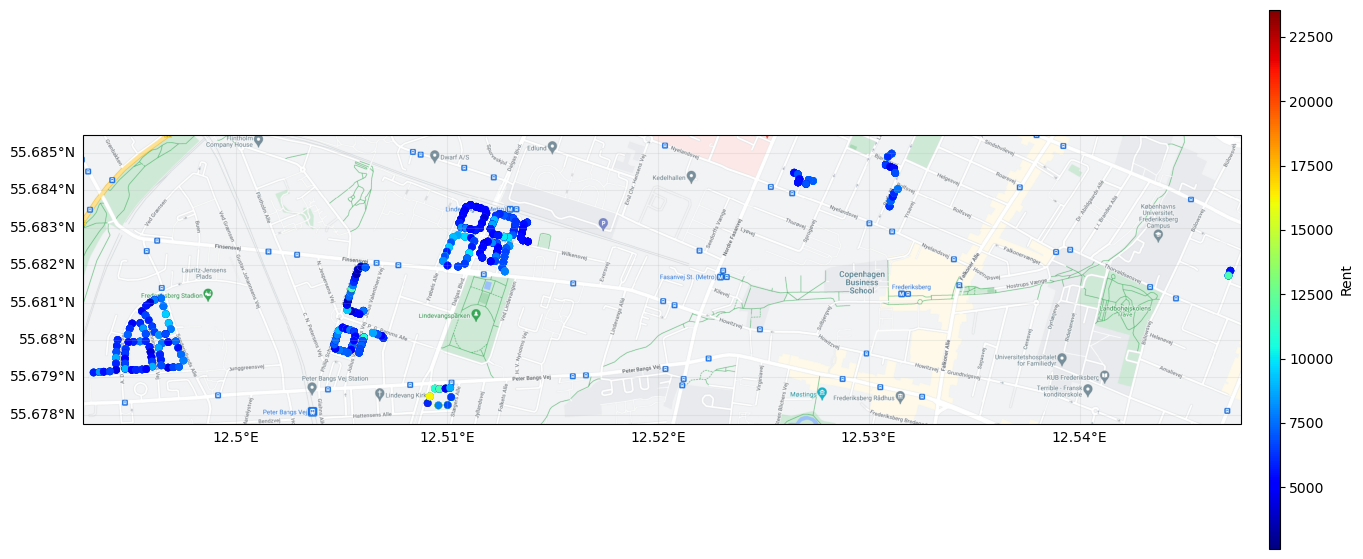

In [129]:
df = pull_prop_data_from_findbolig(prop_names)

request = cimgt.GoogleTiles()

fig, ax = plt.subplots(figsize=(18, 7), subplot_kw={"projection" : request.crs})

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, alpha=0.2)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Calculate extent based on data points
min_lon, max_lon = df["longitude"].min(), df["longitude"].max()
min_lat, max_lat = df["latitude"].min(), df["latitude"].max()
buffer = 0.0005  # Add some buffer to the extent
ax.set_extent([min_lon - buffer, max_lon + buffer, min_lat - buffer, max_lat + buffer], crs=ccrs.PlateCarree())

scatter = ax.scatter(df["longitude"], df["latitude"], transform=ccrs.PlateCarree(), s=20, c=df["rent"] ,alpha=1, cmap='jet')
ax.add_image(request, 16)

cbar = fig.colorbar(scatter, ax=ax, orientation='vertical', pad=0.02, aspect=50)
cbar.set_label('Rent')
plt.show()

In [11]:
df = pull_prop_data_from_findbolig(["Lineagården"])

request = cimgt.GoogleTiles()

fig, ax = plt.subplots(figsize=(5, 7), subplot_kw={"projection" : request.crs})

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, alpha=0.2)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Calculate extent based on data points
min_lon, max_lon = df["longitude"].min(), df["longitude"].max()
min_lat, max_lat = df["latitude"].min(), df["latitude"].max()
buffer = 0.0005  # Add some buffer to the extent
ax.set_extent([min_lon - buffer, max_lon + buffer, min_lat - buffer, max_lat + buffer], crs=ccrs.PlateCarree())

scatter = ax.scatter(df["longitude"], df["latitude"], transform=ccrs.PlateCarree(), s=20, c=df["rent"] ,alpha=1, cmap='jet')
ax.add_image(request, 18)

cbar = fig.colorbar(scatter, ax=ax, orientation='vertical', pad=0.02, aspect=50)
cbar.set_label('Rent')
plt.show()

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
df = pull_prop_data_from_findbolig(["Lineagården"])
df = df[df['door'] == "TV"]

# Create a new figure for the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
scatter = ax.scatter(df['longitude'], df['latitude'], df['floor'], c=df['rent'], cmap='jet')

# Add color bar which maps values to colors
colorbar = fig.colorbar(scatter, ax=ax, label='Rent')

# Set labels for each axis
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Floor')

# Show the plot
plt.show()

In [3]:
import matplotlib
matplotlib.use('QtAgg')
# ['GTK3Agg', 'GTK3Cairo', 'GTK4Agg', 'GTK4Cairo', 'MacOSX', 'nbAgg', 'QtAgg', 'QtCairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in ""
Qt: Session management error: Could not open network socket


In [21]:
df = pull_prop_data_from_findbolig(["J.M. Thieles vej 7A"])

fig, ax = plt.subplots()
sc = ax.scatter(df["rent"], df["area"], c = df["days_since_ref"],#c = df["floor"], 
                cmap = "rainbow", marker = "x", alpha = np.where(df['days_since_ref'] >= 0, 1, 0))
plt.colorbar(sc, ax = ax, label = "Days since rented")
ax.set(xlabel = "Rent [kr.]",
       ylabel = "Area [m²]")
ax.grid()
plt.show()

In [22]:
df = pull_prop_data_from_findbolig(["J.M. Thieles vej 7A"])

fig, ax = plt.subplots()
sc = ax.scatter(df["rent"], df["rooms"], c = df["floor"],
                cmap = "rainbow", marker = "x", alpha = 1)
plt.colorbar(sc, ax = ax, label = "Days since rented")
ax.set(xlabel = "Rent [kr.]",
       ylabel = "Area [m²]")
ax.grid()
plt.show()